In [1]:
from AcousticInstrument import Material, Geometry, StringTuning, NoteSimulation, VibrationSimulation, Acoustic
import matplotlib.pyplot as plt
import cv2
%matplotlib widget

In [63]:
board_profile = cv2.imread("board.png", cv2.IMREAD_GRAYSCALE)
wall_profile = cv2.imread("wall.png", cv2.IMREAD_GRAYSCALE)
hole_profile = cv2.imread("hole.png", cv2.IMREAD_GRAYSCALE)
bridge_profile = cv2.imread("bridge.png", cv2.IMREAD_GRAYSCALE)
post_profile = cv2.imread("post.png", cv2.IMREAD_GRAYSCALE)

test_material = Material(
    front_board_k = 55e7,
    back_board_k = 55e7,
    front_board_k_diag = 35e7,
    back_board_k_diag = 35e7,
    post_k = 12e9,
    bridge_k = 1e8,

    front_board_density = 1500,
    back_board_density = 1500,
    post_m = 0.3,
    bridge_m = 0.3,

    alpha = 5,
    beta = 1e-12
)

test_design = Geometry(
    board_profile = board_profile,
    wall_profile = wall_profile,
    holes_profile = hole_profile,
    board_thickness= 0.007,
    chamber_height = 0.08,

    bridge_location = bridge_profile,
    post_location = post_profile,
    meter_per_pixel= 6.666e-3
)

test_tuning = StringTuning(
    string_tension = 80,
    string_mass_per_length = 1.140e-3,
    eff_string_length = 0.635,
    num_node = 200
)

test_input = NoteSimulation(
    input_type = VibrationSimulation.PLUCK,
    input_fractional_location = 0.2,
    input_amplitude = 0.01,
    simulation_period = 2,
    sampling_rate = 44100,
    acoustic_gain = 1e5
)

test_object = Acoustic(test_design, test_material, test_tuning, test_input)

Finished Creating Front Board
Finished Creating Back Board
Finished Creating Bridge
Finished Creating Post
Finished Creating String


MemoryError: Unable to allocate 145. MiB for an array with shape (4366, 4366) and data type float64

C:\Users\Khac Hieu Dinh\AppData\Local\Temp\ipykernel_16540\1592164855.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(2,1)


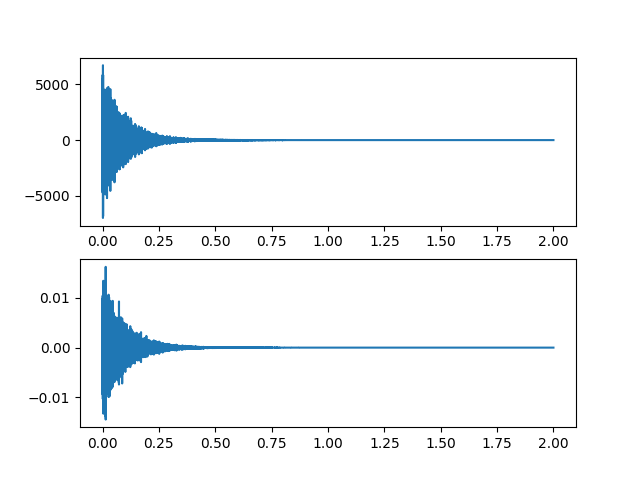

In [60]:
time_sample_locations = test_object.system_response.time_sampling_points
signal_time_series = test_object.system_response.time_series_response
sample_element_offset = test_object.global_system.front_board_index_offset + 10 

sample_signal = test_object.system_response.sampling_region_response
sample_element_signal = test_object.system_response.time_series_response[sample_element_offset,:]

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(time_sample_locations, sample_signal)
ax2.plot(time_sample_locations, sample_element_signal)

In [61]:
from scipy.io.wavfile import write
import numpy as np
sample_rate = test_input.sampling_rate
write("test_sound.wav",sample_rate, sample_signal.astype(np.int16))
